In [1]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [2]:
import numpy as np
import pandas as pd
from core.loader import StockLoader
import matplotlib.pyplot as plt
from datetime import date

In [3]:
today = date.today().strftime('%Y-%m-%d')

In [4]:
# get TCB price in 2022.
loader = StockLoader('2022-01-01',today)
TCB_price = loader.load_data_of_a_symbol(symbol='TCB')

In [5]:
df = TCB_price[['date', 'close']]
df = df.sort_values('date').reset_index()
df['income'] = df['close'].diff()
del df['index']
df.fillna(0)

,date,close,income
0,2022-01-04,50.90,0.00
1,2022-01-05,50.50,-0.40
2,2022-01-06,49.90,-0.60
3,2022-01-07,49.45,-0.45
4,2022-01-10,48.65,-0.80
...,...,...,...
177,2022-09-22,34.55,0.05
178,2022-09-23,34.20,-0.35
179,2022-09-26,33.25,-0.95
180,2022-09-27,33.50,0.25


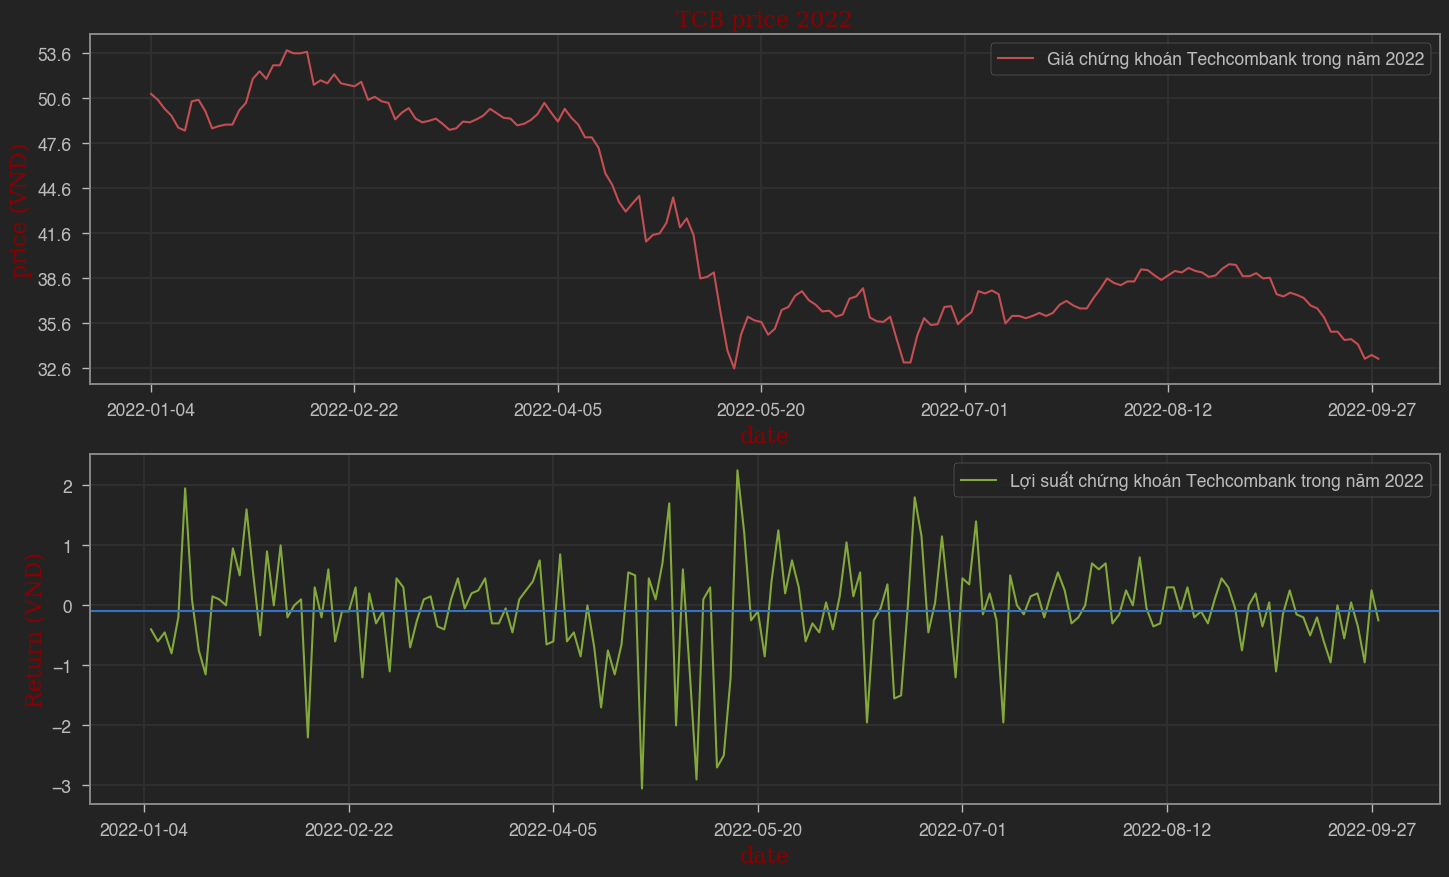

In [6]:
# visual data from df with plt.plot
plt.figure(figsize=(18,10))
# declare font:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
# delcare x,y, z
x, y, z = df['date'], df['close'], df['income']
plt.subplot(2,1,1)
plt.plot(x, y, label ='Giá chứng khoán Techcombank trong năm 2022', color='r')

plt.title('TCB price 2022', fontdict=font)
# plt.text(75,50,'Giá TCB trong năm 2022', fontdict=font)
plt.xlabel("date", fontdict=font)
plt.ylabel("price (VND)", fontdict=font)
plt.xticks(np.arange(0,len(x),30))
plt.yticks(np.arange(min(y), max(y), 3))

plt.subplots_adjust(left=0.15)
plt.grid()
plt.legend()

##########
plt.subplot(2,1,2)
plt.plot(x, z, label ='Lợi suất chứng khoán Techcombank trong năm 2022', color='g')

# plt.title('TCB return 2022', fontdict=font)
# plt.text(75,50,'Giá TCB trong năm 2022', fontdict=font)
plt.xlabel("date", fontdict=font)
plt.ylabel("Return (VND)", fontdict=font)
plt.xticks(np.arange(0,len(x),30))
# plt.yticks(np.arange(min(z), max(z), 0.3))
plt.axhline(y=np.nanmean(z))
plt.subplots_adjust(left=0.15)
plt.grid()
plt.legend(loc='upper right')
plt.show()

In [68]:
# Đánh giá: Các đánh giá của tác giả mang tính chủ quan nên không công bố.
muy, sigma = round(np.mean(df['income']),3), round(np.std(a=df['income']),4)
print(muy, sigma)

-0.098 0.8053


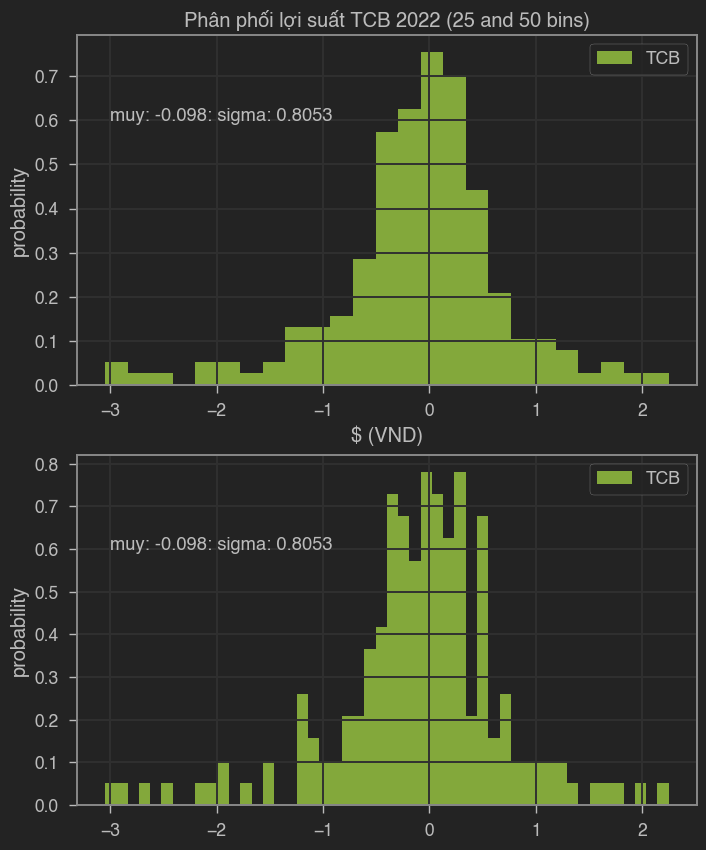

In [78]:
# visual chuỗi lợi suất của cổ phiếu TCB năm 2022 bằng biểu đồ histogram:
plt.figure(figsize=(8,10))

plt.subplot(2,1,1)
n, bins, patches = plt.hist(df['income'], 25, density=True, facecolor='g', label='TCB')

plt.xlabel('$ (VND)')
plt.ylabel('probability')
plt.title('Phân phối lợi suất TCB 2022 (25 and 50 bins)')
plt.text(-3,0.6,'muy: {0}: sigma: {1}'.format(muy,sigma))
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
n, bins, patches = plt.hist(df['income'], 50, density=True, facecolor='g', label='TCB')

plt.ylabel('probability')
plt.text(-3,0.6,'muy: {0}: sigma: {1}'.format(muy,sigma))
plt.legend()
plt.grid(True)
plt.show()

Đánh giá:
    Với biểu đồ histogram, ta có thể thấy dường như chuỗi lợi suất của cổ phiếu TCB 
    ở dạng phân phối chuẩn với lợi suất kỳ vọng gần = 0 và phương sai khoảng 800 VND.
Tuy nhiên, khi tăng số lượng cột trong biểu đồ hist bên trên, chuỗi lợi suất bắt đầu phân rã và không còn ở dạng phân phối chuẩn nữa, lợi suất chỉ tập trung nhiều ở một số phân vùng nhỏ nhất định, với cá bước nhảy có thể nhìn rõ bởi vì ảnh hưởng của độ chia nhỏ nhất của mức giá giao dịch, cũng như việc áp dụng trần giao dịch khiển lợi suất chịu ảnh hưởng của biên độ giao dịch.

    

In [79]:
# next: Kiểm định tính dừng của chuỗi lợi suất TCB năm 2022, 
# tiến hành mở rộng ra kiểm định cho chuỗi lợi suất toàn thời gian của TCB